<a href="https://colab.research.google.com/github/M-AdityoRahman/PCVK_Ganjil_2025/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-3631538450.py:19: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)


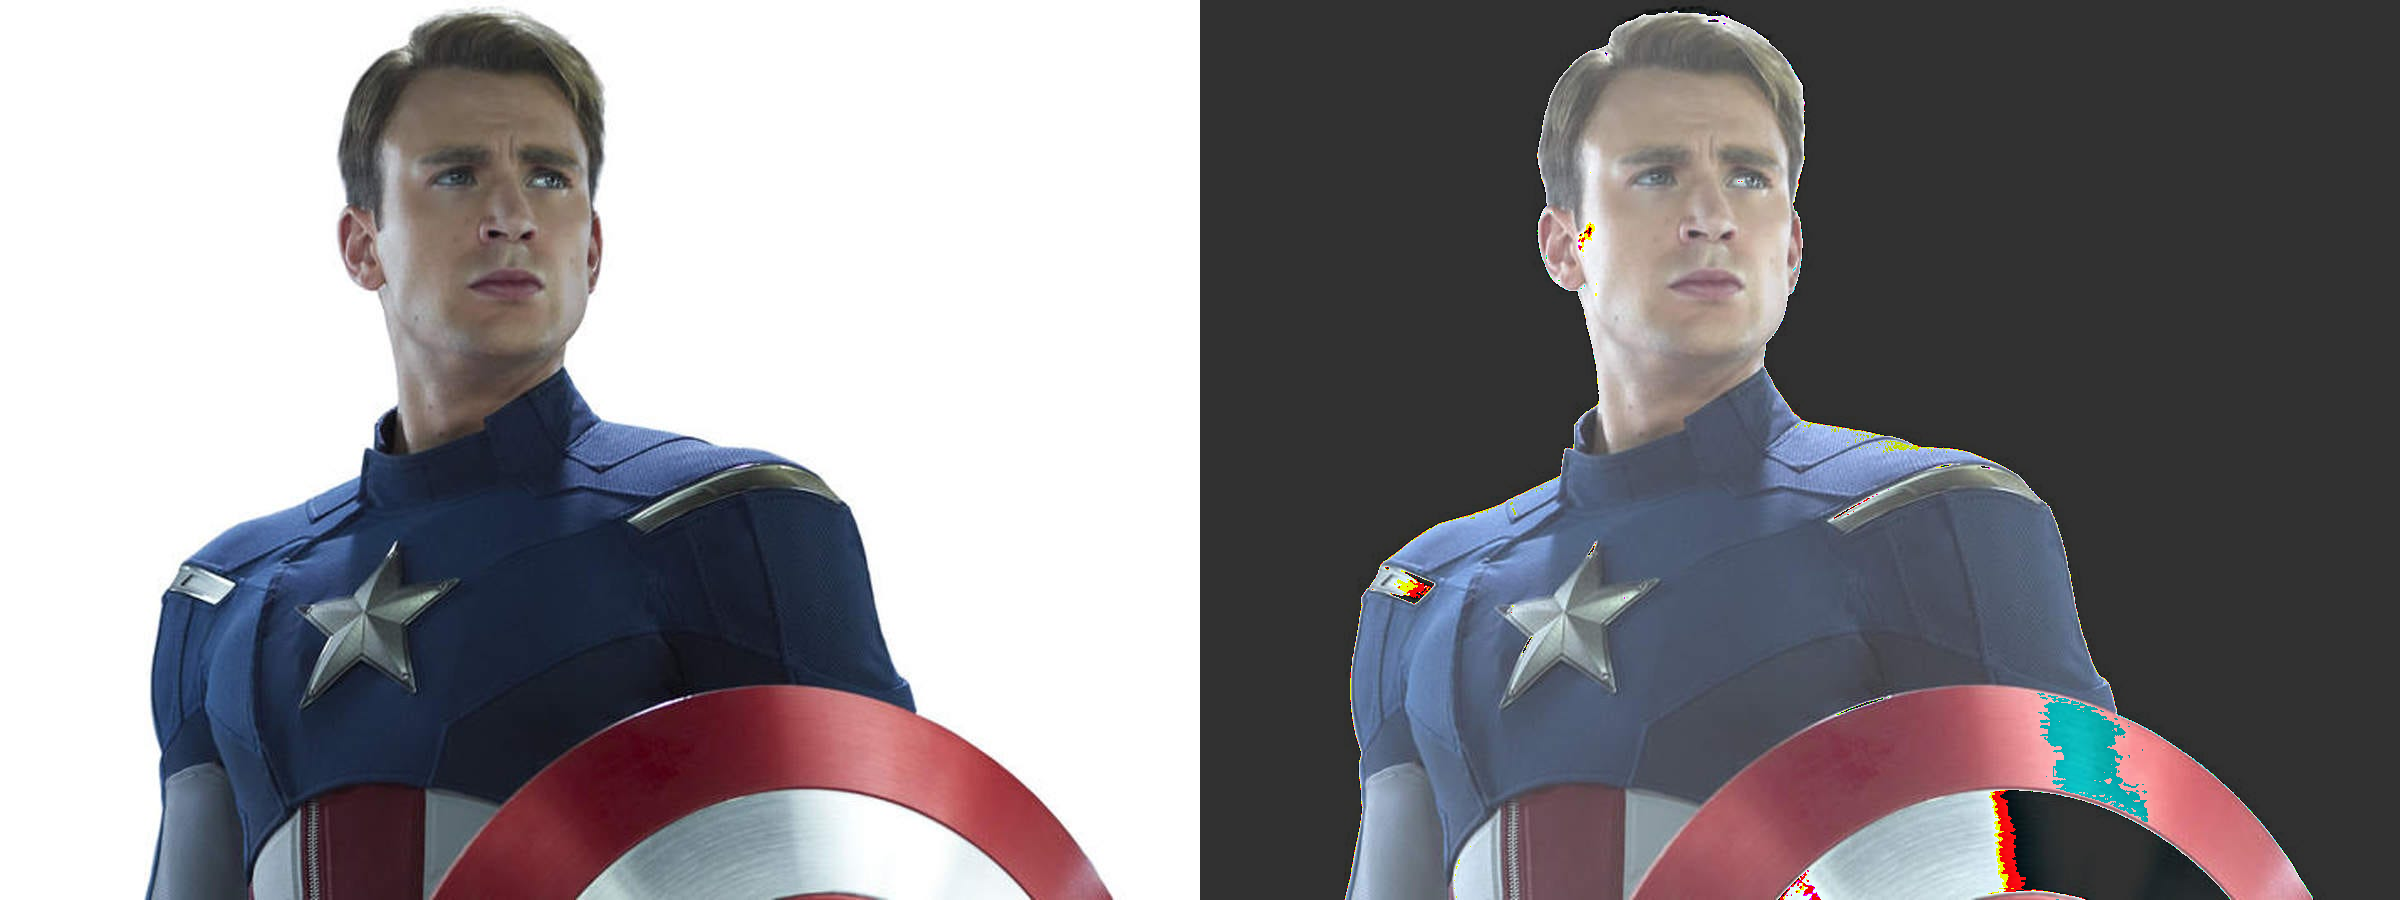

In [5]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/captAmerica.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

# Loop per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# Alternatif lebih sederhana
# brightness_image = cv2.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)

**TUGAS**

1. Implement image inverse in your code using formula shown in the theoretical background subsection above, giving the output shown in the following figure:

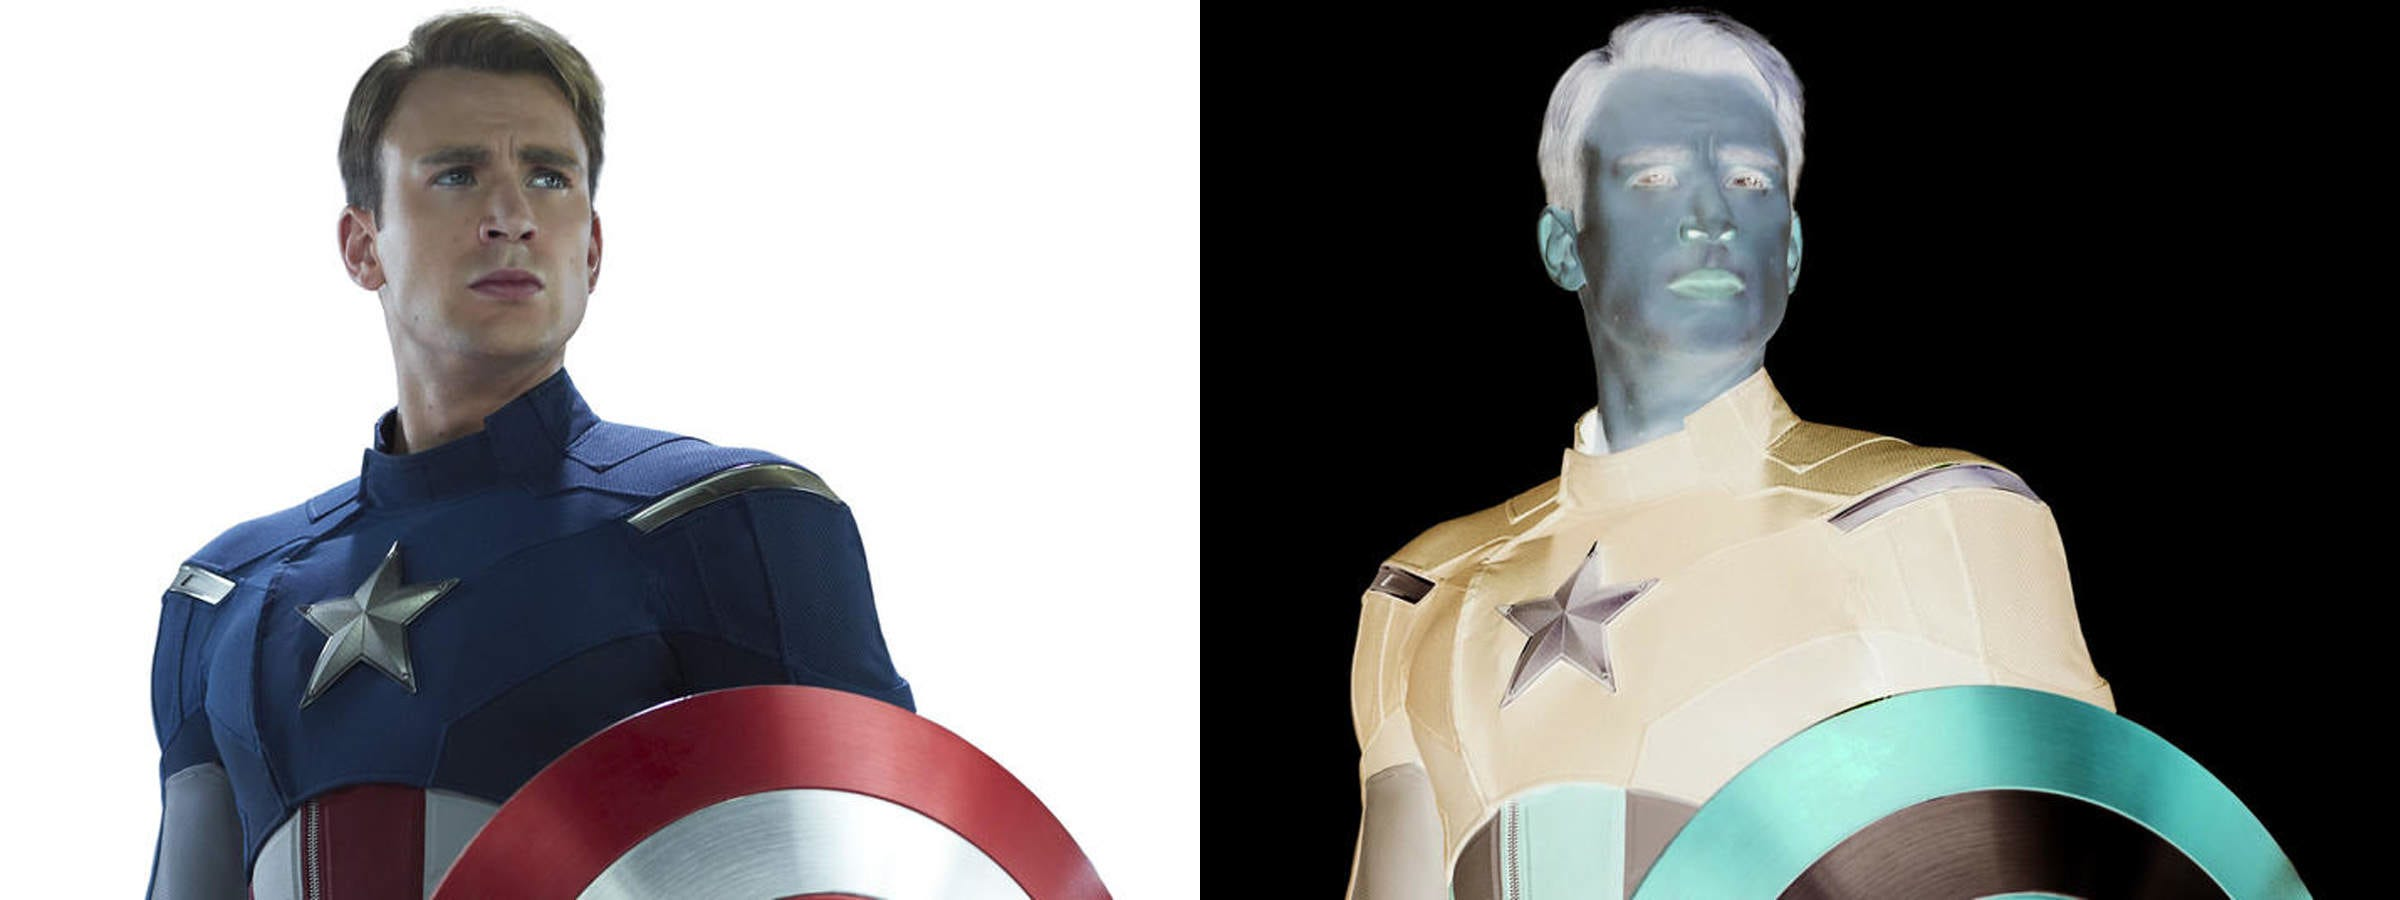

In [6]:
def inverse_image(img):
    return 255 - img

inversed = inverse_image(original)
final_inverse = cv.hconcat([original, inversed])
cv2_imshow(final_inverse)

Analisis: Setiap pixel dikurangi dari 255 untuk menghasilkan efek negatif. Operasi ini sederhana dan reversibel.

2. Implement contrast transformation in Google Collaboratory using the formula written in the Theoretical background section, giving the output shown in the following figure:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


/tmp/ipython-input-1655875389.py:22: RuntimeWarning: overflow encountered in scalar subtract
  new_val = factor * (original[y, x, c] - 128) + 128


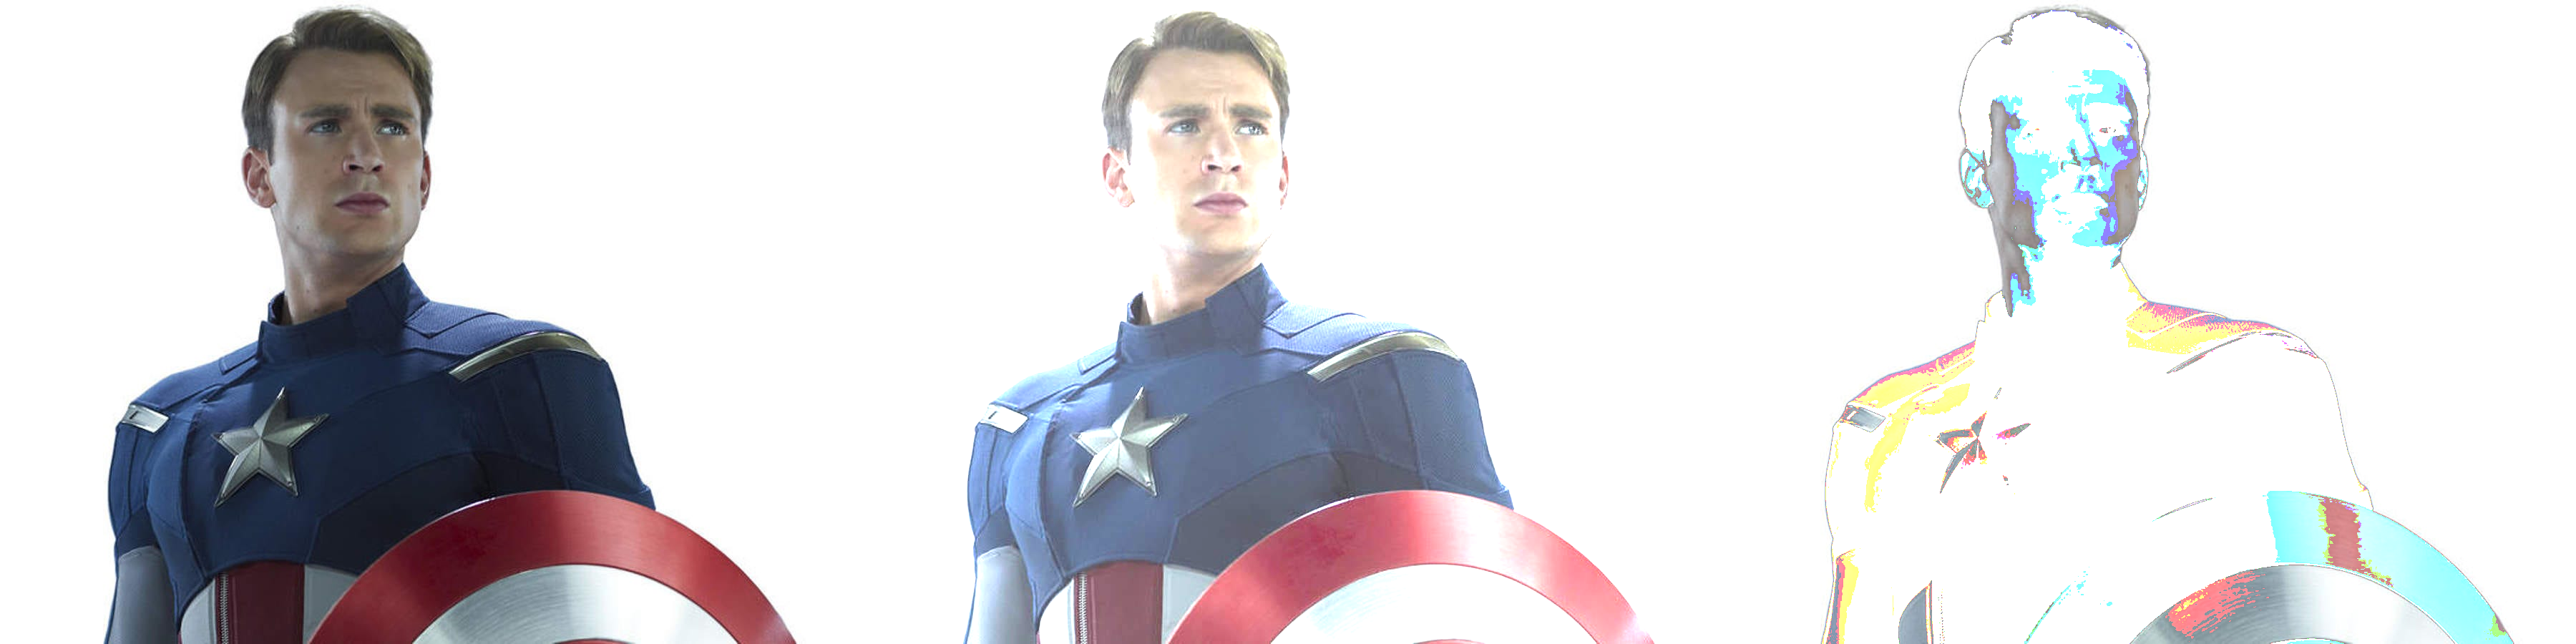

In [7]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, not a number')

# Metode 1: g(x,y) = a * f(x,y) + b
contrast_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            contrast_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

# Metode 2: Contrast Correction Factor
factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
contrast_image2 = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            new_val = factor * (original[y, x, c] - 128) + 128
            contrast_image2[y, x, c] = np.clip(new_val, 0, 255)

final_contrast = cv.hconcat([original, contrast_image, contrast_image2])
cv2_imshow(final_contrast)

Analisis: Metode pertama menggunakan rumus langsung, sedangkan metode kedua menggunakan faktor koreksi kontras. Keduanya memerlukan clipping untuk menjaga nilai pixel.

3. Implement transformation of logarithmic brightness on Google Colaboratory using the
formula written in the Theoretical Background Reviews, generating output shown in
the following figure:

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 40


/tmp/ipython-input-1332409839.py:12: RuntimeWarning: overflow encountered in scalar add
  log_image[y, x, channel] = np.clip(c * np.log(1 + original[y, x, channel]), 0, 255)
/tmp/ipython-input-1332409839.py:12: RuntimeWarning: divide by zero encountered in log
  log_image[y, x, channel] = np.clip(c * np.log(1 + original[y, x, channel]), 0, 255)


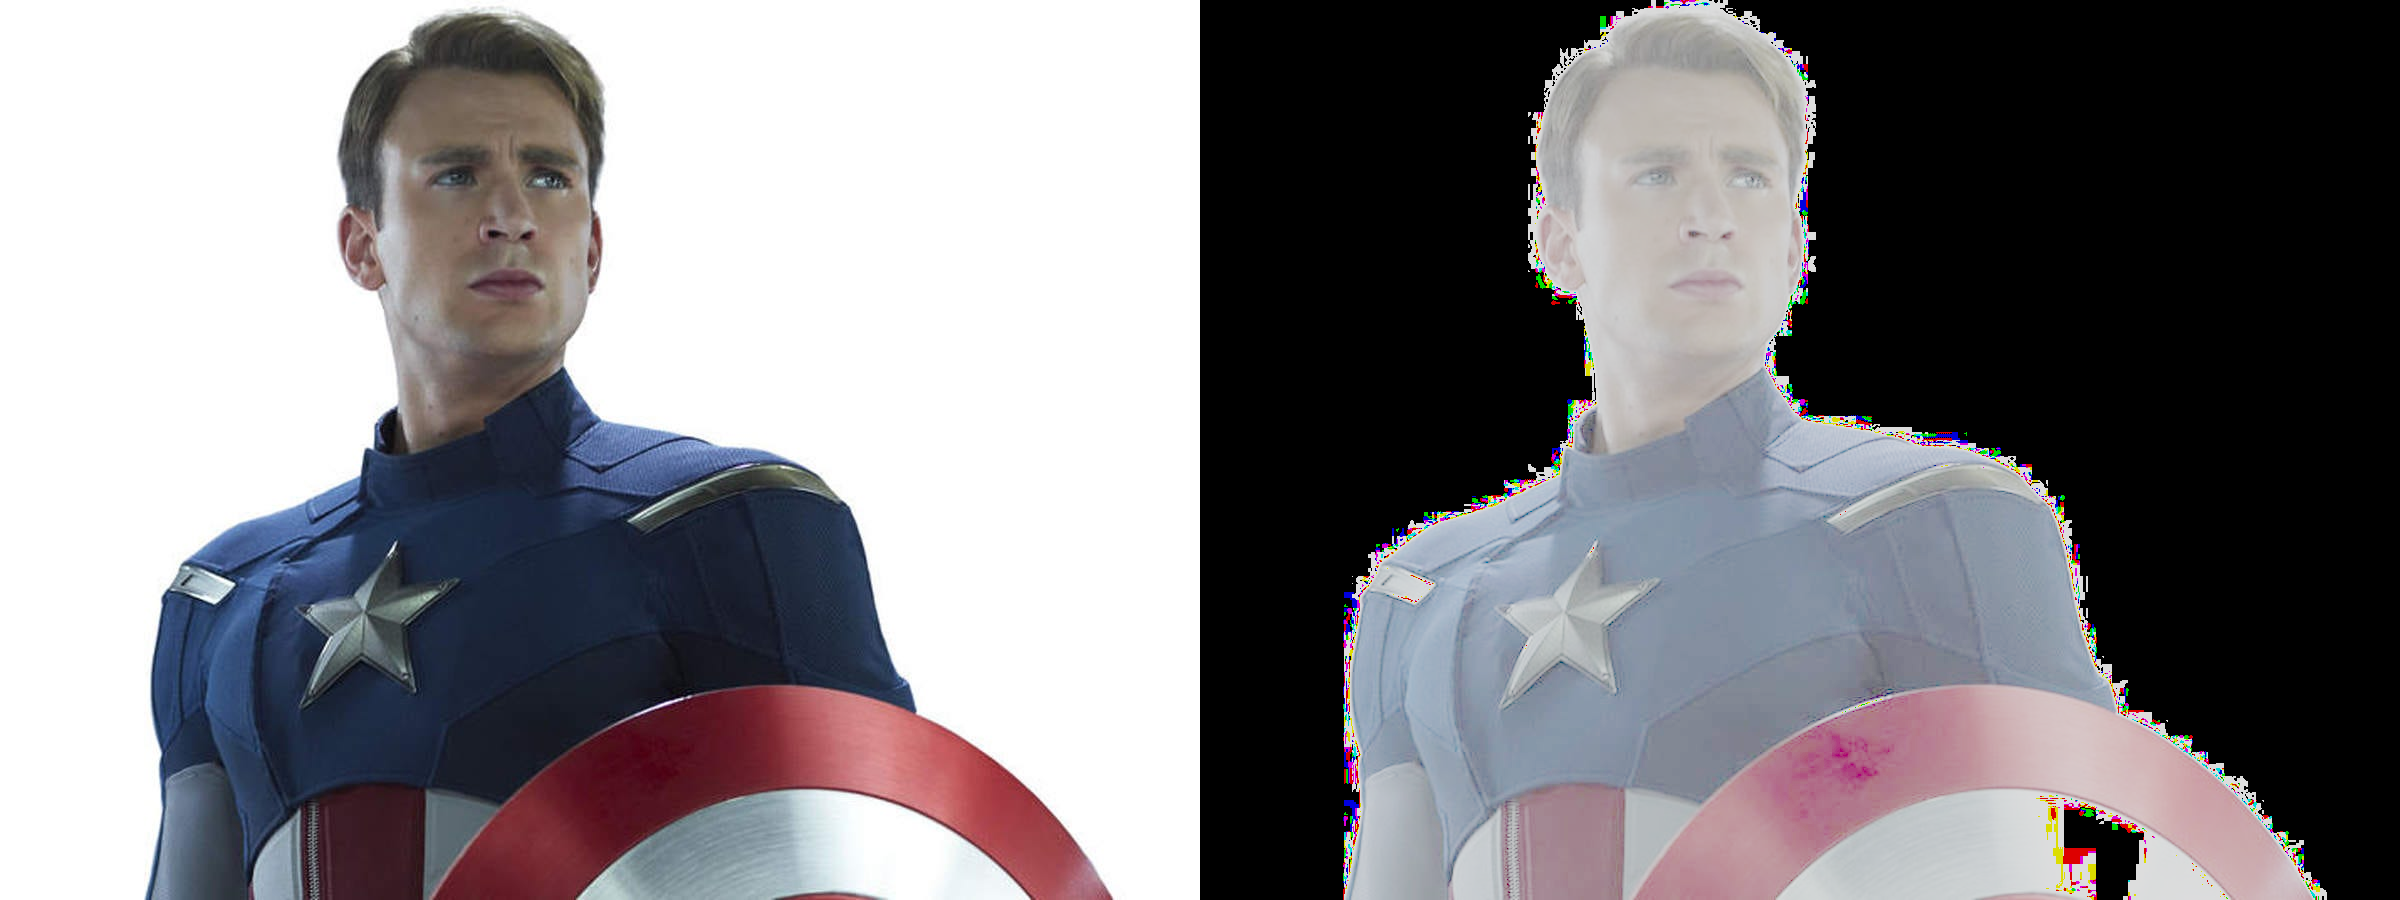

In [8]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
    c = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

log_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for channel in range(original.shape[2]):
            log_image[y, x, channel] = np.clip(c * np.log(1 + original[y, x, channel]), 0, 255)

final_log = cv.hconcat([original, log_image])
cv2_imshow(final_log)

Analisis: Transformasi logaritmik memperlebar rentang nilai pixel gelap dan memampatkan nilai terang. Berguna untuk meningkatkan detail di area gelap.

4. Implement grayscale transformation using the averaging, lightness, and luminance method on Google Colaboratory using the formula written in the Theoretical Background Reviews, generating output as follows :

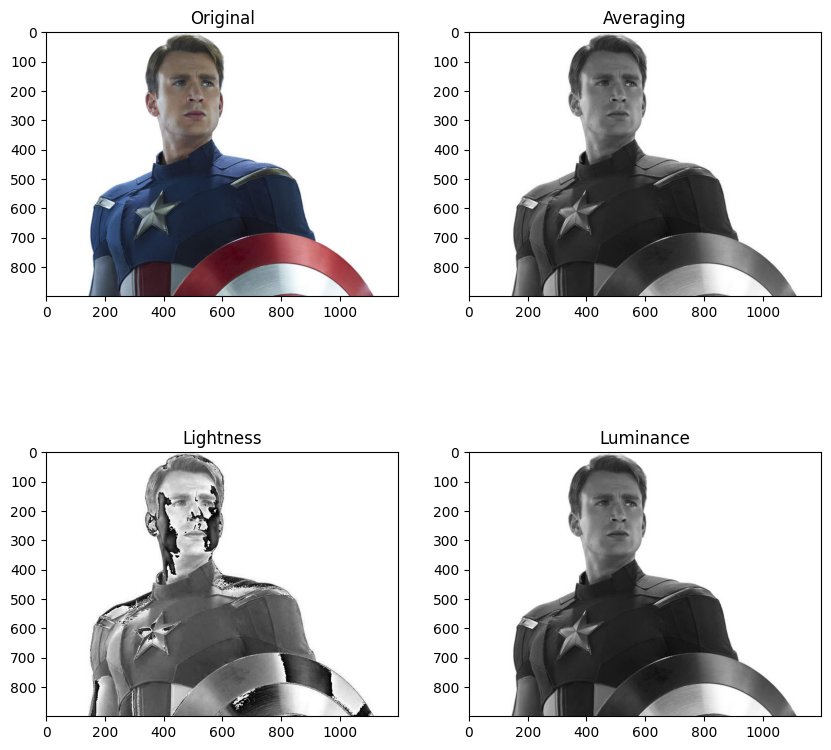

In [9]:
# A. Averaging
gray_avg = np.mean(original, axis=2).astype(np.uint8)

# B. Lightness
gray_lightness = (np.max(original, axis=2) + np.min(original, axis=2)) / 2
gray_lightness = gray_lightness.astype(np.uint8)

# C. Luminance
gray_luminance = 0.21 * original[:,:,2] + 0.72 * original[:,:,1] + 0.07 * original[:,:,0]
gray_luminance = gray_luminance.astype(np.uint8)

# Tampilkan hasil
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
axs[0, 0].set_title('Original')
axs[0, 1].imshow(gray_avg, cmap='gray')
axs[0, 1].set_title('Averaging')
axs[1, 0].imshow(gray_lightness, cmap='gray')
axs[1, 0].set_title('Lightness')
axs[1, 1].imshow(gray_luminance, cmap='gray')
axs[1, 1].set_title('Luminance')
plt.show()

5. Show certain colors in the image , and change other colors to grayscale. For example ,
show the blue color in the image input and change the parts other which is not colored
blue into grayscale as in the example below :

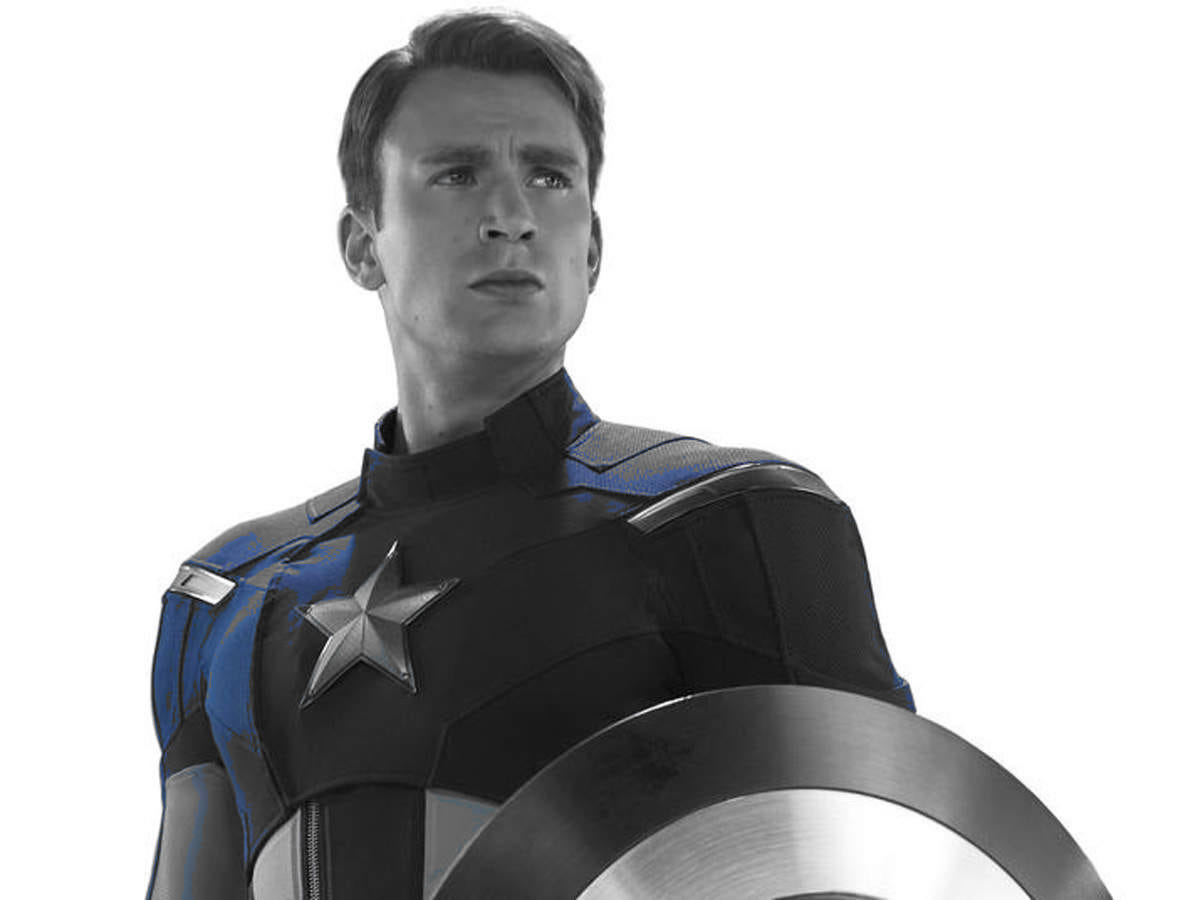

In [10]:
# Definisikan range warna biru dalam BGR
lower_blue = np.array([100, 0, 0])
upper_blue = np.array([255, 100, 100])

# Buat mask untuk area biru
mask = cv.inRange(original, lower_blue, upper_blue)

# Konversi original ke grayscale (luminance)
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray_3ch = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Gabungkan: area biru tetap berwarna, lainnya grayscale
result = np.where(mask[:,:,np.newaxis], original, gray_3ch)

cv2_imshow(result)

Analisis: Mask digunakan untuk memilih pixel biru. Pixel lain diubah ke grayscale. Hasilnya adalah gambar dengan hanya warna biru yang dipertahankan.